## ProfilePlotter base example using Kakuma data
#### All data for this example is provided within the repository. For your own example, it is explained where to get the pertinent data along the way

In [ ]:
# import necessary packages
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os


sys.path.append('../src/ProfilePlotter')
import ProfilePlotter as pplotter


#the .xyz data are exported from the correspondendt WorkBench's inversion node
ttem_path = "../Examples/xyz/SCI_tTEM_smooth_MOD_inv.xyz"
stem_path_1 = "../Examples/xyz/sTEM_202308and202402_MOD_inv.xyz"
stem_path_2 = "../Examples/xyz/sTEM_202405and06_MOD_inv.xyz"
profiler_path =  "../Examples/xyz/Profiler_202406_MOD_inv.xyz"


# create model object
model = pplotter.Model()


# populate model object with dictionaries of ttem data
# to remove data sets a new model object can be created

model.loadXYZ(ttem_path, mod_name='Kakuma_tTEM', model_type='tTEM')
model.loadXYZ(stem_path_1, mod_name='sTEM_202308and202402_Kakuma', model_type='sTEM')
model.loadXYZ(stem_path_2, mod_name='sTEM_202405and06_Kakuma', model_type='sTEM')
model.loadXYZ(profiler_path, mod_name='/Profiler_202406_Kakuma', model_type='profiler')

### Grab the .shp & .shx files for the desired Aarhus Workbench profiles from the "Maps" folder in your WorkSpace

In [9]:

prof_coord_paths = glob('../Examples/profiles' + '/*.shp')
# profile coords are saved as a list of dictionaries
model.loadProfileCoords(prof_coord_paths)
#In this case there are 2 profiles, we'll select one of them
profile_idx = 1
#A tTEM interpolation happens with the following call. There needs to be at least 1 ttem sounding within the interp_radius
model.createProfiles(ttem_model_idx=0, profile_idx = profile_idx, interp_radius=100, model_spacing=10) 

c:\Users\au487220\OneDrive - Aarhus universitet\Documents\Repositories\ProfilePlotter\Examples\../src/ProfilePlotter\ProfilePlotter.py:304: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights, axis=0)


### Add borehole information in .dat format

In [ ]:
# get a list of all the borehole paths
borehole_paths = glob("../Examples/boreholes"+"/*.dat")

#load from .dat files
model.loadBoreholes(borehole_paths)

### Plot the profile with the desired data on it

Borehole 4A is 1.320 km from profile, it was not included.
Borehole 4E is 0.977 km from profile, it was not included.
Borehole 5B is 1.974 km from profile, it was not included.
Borehole 9 is 1.952 km from profile, it was not included.
Borehole test_drilling_2 is 1.589 km from profile, it was not included.
No boreholes plotted for profile D_01. No legend created


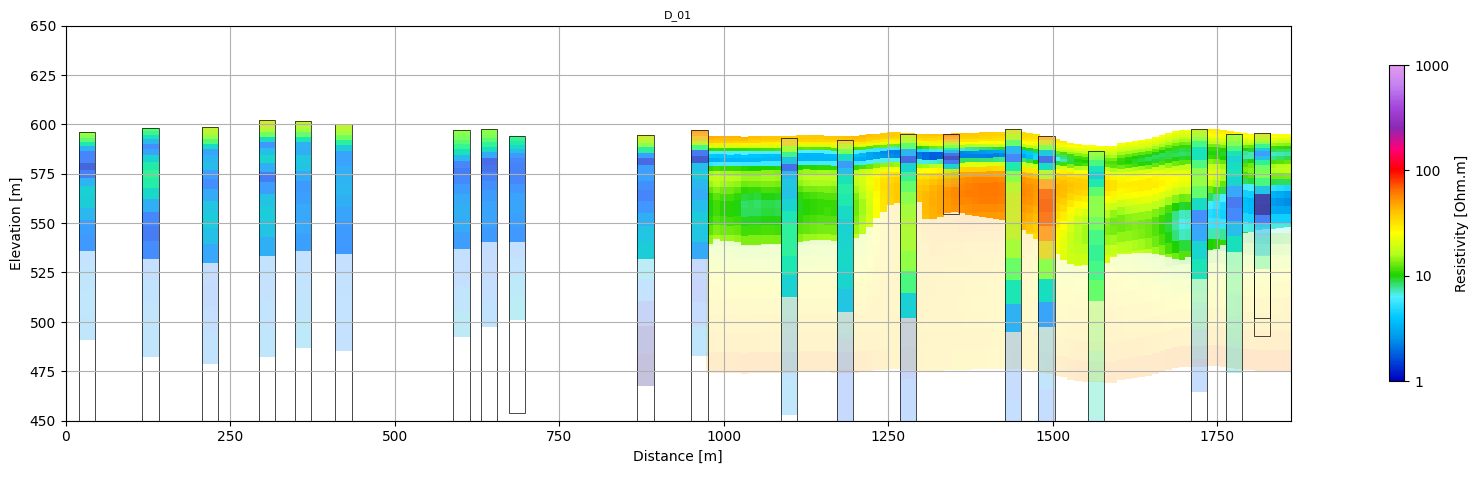

In [10]:

# Create the plot object for the plotting of the previous models
plot = pplotter.Plot(model)
#create the axis that will be passed onto the Plot class TEMProfile method
fig, ax = plt.subplots(1, 1, figsize=(20,5))
#How much the profile gets stretch vertically
scale = 3
vmin=1
vmax=1000
#create the tTEM profile with the desired parameters
plot.TEMProfile(profile_idx=profile_idx, zmin=450, zmax=650,ax=ax , scale=scale, cbar=True, cbar_orientation='vertical', vmin=vmin, vmax=vmax)
#add the rest of the TEM soundings to it
plot.addTEMSoundings(profile_idx=profile_idx, stem_model_idx=0, search_radius=100, model_width=35, ax=ax, print_msg=False, vmax=vmax)
plot.addTEMSoundings(profile_idx=profile_idx, stem_model_idx=1, search_radius=100, model_width=35,ax=ax, print_msg=False, vmax=vmax)
plot.addProfilerSoundings(profile_idx=profile_idx, profiler_model_idx=0, search_radius=50, model_width=25, ax=ax, print_msg=False, vmax=vmax)
#add the boreholes in the following way
plotted_boreholes_tuple = plot.addBoreholes(profile_idx=profile_idx, ax=ax, search_radius = 150, bh_width=20 , print_msg=True, alpha=1, add_label=True,text_size=15, shift=20) #we get the plotted boreholes and the profile idx in plotted_boreholes_tuple
# Add the borehole legend as a separate image, passing the plotted boreholes
plot.addBoreholeLegend(plotted_boreholes_tuple, text_size=10, max_char=100)




### Plot the profile on some background tif file. It's important that the tif file is exactly in the same EPSG than the .xyz and profiles. 
#### The start and end of the profiel are plotted, avoiding confusions with the end user whether it's a NS or a SN profile. 
#### Also, for non-straight line profiles, the ticks on the map correspond with the x-axis ticks on the 2D profile created above 

(<Figure size 1000x800 with 1 Axes>,
 <Axes: xlabel='Easting [m]', ylabel='Northing [m]'>)

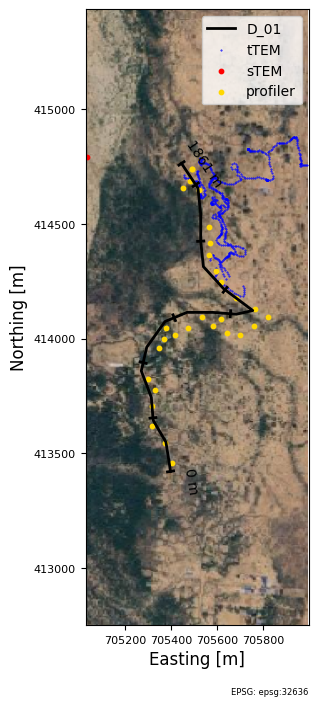

In [11]:

tif_file = '../Examples/tiff/Kakuma_EPSG_32636.tif'

plot.profileMap(profile_idx=profile_idx, buffer=0.5, ax=None, tif_file=tif_file, modeltype_1_size=0.2)